# Dataset
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

1. Load dataset
2. analyze basic stats
3. select features
4. No Train, test --> because we dont have target column to test accuracy (Unsupervised)
5. Scale the data
6. loop over multiple values of k and calculate their final WCSS score
7. Plot K vs WCSS to find optimal value of K
8. Use optimal value of K
9. Initialize Kmeans object with selected K
10. Fit the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
print("Missing Values:", df.isnull().sum())


Missing Values: CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [8]:
le = LabelEncoder()

In [9]:
df['Gender'] = le.fit_transform(df['Gender'])

In [11]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [12]:
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [13]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [17]:
X_scaled[0:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

# Elbow Method to find optimal K

In [18]:
wcss = []
K_range = range(1, 30)

In [19]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=20, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # Inertia = WCSS

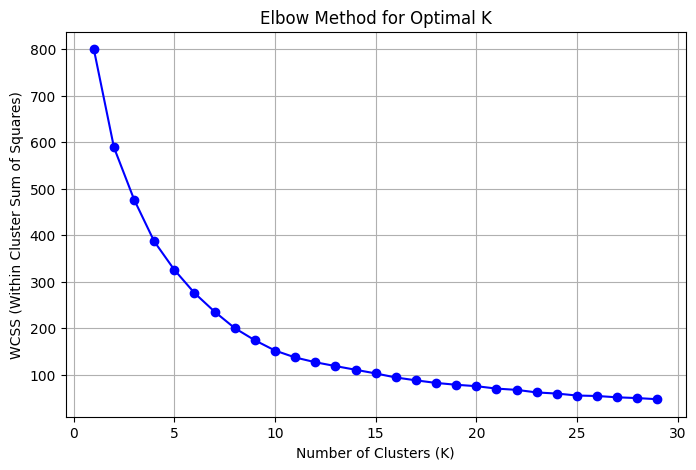

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [ ]:
# 0-1, 1-2, 2-3, 3-4, 4-5 --> Drops abruptly

# 4-5, 5-6, 6-7 --> Drops to become flatter

# 7-n --> becomes flatter and flatter

In [21]:
k_optimal = 5

In [22]:
kmeans_final = KMeans(n_clusters=k_optimal, init='k-means++', random_state=20, n_init=10)

# init defines how centroids are initialized before iterations begin.
# "k-means++" chooses the first centroid randomly, then subsequent 
# centroids farther away from already chosen ones.

# n_init = 10 runs Kmeans 10 times each with different random centroid starting points, and picks the best.

In [23]:
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

In [26]:
df.head(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,4
2,3,0,20,16,6,2
3,4,0,23,16,77,1
4,5,0,31,17,40,2
5,6,0,22,17,76,1
6,7,0,35,18,6,2
7,8,0,23,18,94,1
8,9,1,64,19,3,0
9,10,0,30,19,72,1


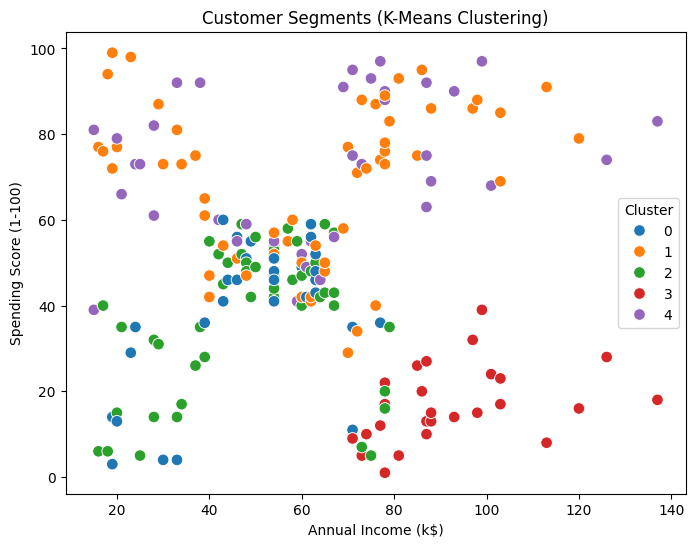

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='Cluster', palette='tab10', data=df, s=70
)
plt.title('Customer Segments (K-Means Clustering)')
plt.show()

In [28]:
from sklearn.decomposition import PCA

In [29]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [30]:
X_pca

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

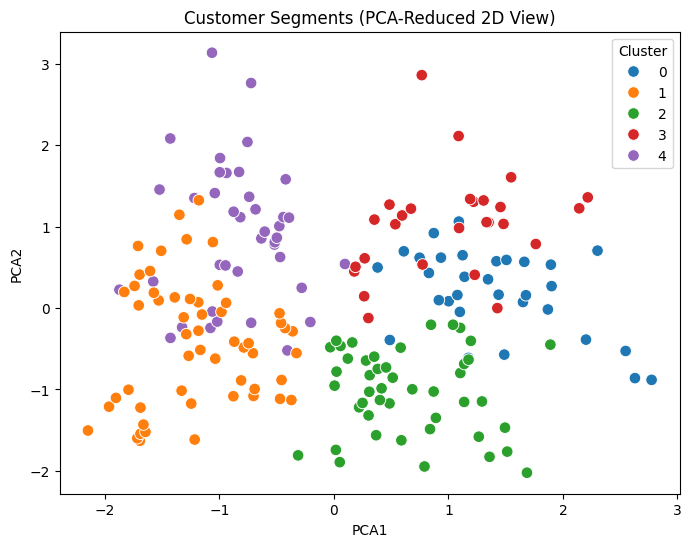

In [31]:
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot clusters in PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='tab10', data=df, s=70)
plt.title('Customer Segments (PCA-Reduced 2D View)')
plt.show()

In [32]:
centroids = kmeans_final.cluster_centers_
print(centroids)

[[ 1.12815215  1.22385356 -0.4498575  -0.44231533]
 [-0.88640526 -0.75047453 -0.00501655  0.6979562 ]
 [-0.88640526  0.73155219 -0.44455768 -0.50400513]
 [ 0.38201978  0.03202921  1.20287422 -1.31619469]
 [ 1.12815215 -0.76072691  0.05496398  0.83369302]]


In [33]:
centroids_original = scaler.inverse_transform(centroids)

In [34]:
pd.DataFrame(centroids_original, columns=X.columns)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.000000e+00,55.903226,48.774194,38.806452
1,-2.775558e-16,28.392857,60.428571,68.178571
2,-1.110223e-16,49.043478,48.913043,37.217391
3,6.296296e-01,39.296296,92.074074,16.296296
4,1.000000e+00,28.250000,62.000000,71.675000


In [35]:
print("Cluster Counts:\n", df['Cluster'].value_counts())


Cluster Counts:
 Cluster
1    56
2    46
4    40
0    31
3    27
Name: count, dtype: int64


In [36]:
df.to_csv("Mall_Customers_Clustered.csv", index=False)

In [44]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,4
2,3,0,20,16,6,2
3,4,0,23,16,77,1
4,5,0,31,17,40,2
5,6,0,22,17,76,1
6,7,0,35,18,6,2
7,8,0,23,18,94,1
8,9,1,64,19,3,0
9,10,0,30,19,72,1
